###  inicio

In [355]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [356]:
file_string = "cursivo.png"

### img

(481, 1914, 3)


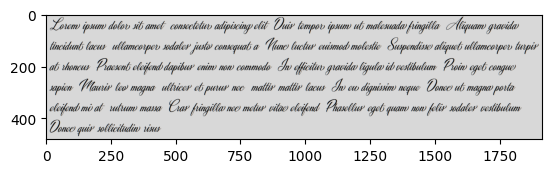

In [357]:
img = cv.imread(file_string)
print(img.shape)
comap = plt.cm.gray
img = cv.bitwise_not(img)
plt.imshow(img)


In [358]:
w = 1914
h = 481

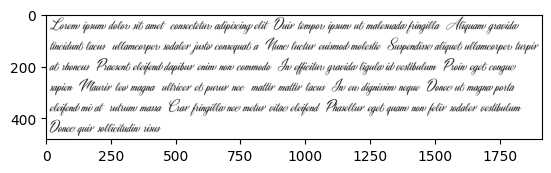

In [359]:
img_gs = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_gs, cmap = plt.cm.gray)

255


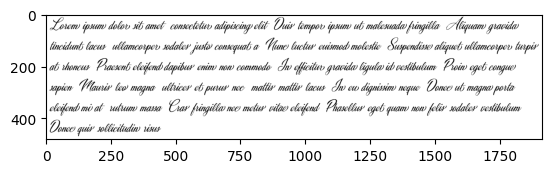

In [360]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

th, im_gray_th_otsu = cv.threshold(img_gray, 128, 255, cv.THRESH_OTSU)

plt.imshow(im_gray_th_otsu, cmap = plt.cm.gray)
#https://matplotlib.org/stable/users/explain/colors/colormaps.html

print(im_gray_th_otsu[0][0])

### Identificando o valor médio de uma área de texto intensa

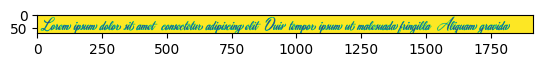

In [361]:
plt.imshow(im_gray_th_otsu[0:70,])

In [362]:
maior = 0
menor = 255
media_img = 0
for y in range(0, 80):
    sum = 0
    for x in range(0,w):
        sum += im_gray_th_otsu[y][x]
    media_linha = sum/w
    media_img += media_linha
    if media_linha > maior:
        maior = media_linha
    if media_linha < menor:
        menor = media_linha
    print("{:.2f}".format(media_linha))
media_img = media_img/70
print(f"media {media_img} ||| maior {maior} ||| menor {menor}")

255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
254.73
254.60
252.60
252.60
252.87
252.74
252.74
252.74
252.60
252.74
252.20
251.94
251.67
251.27
251.54
251.40
251.27
244.74
242.74
241.28
238.75
234.48
236.48
239.55
243.41
243.01
242.74
228.75
240.34
234.35
196.38
178.13
176.79
175.86
173.86
174.26
174.93
169.47
170.40
170.80
167.20
166.67
168.27
163.61
160.67
165.60
168.40
175.60
222.49
244.34
246.47
246.87
248.87
249.14
250.20
249.54
249.80
250.47
251.00
250.60
250.74
251.00
251.27
251.27
251.80
253.27
253.00
255.00
255.00
255.00
media 264.81325570980744 ||| maior 255.0 ||| menor 160.67398119122257


### Identificando o valor médio em uma área vazia

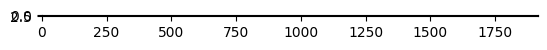

In [363]:
plt.imshow(im_gray_th_otsu[71:75,])

In [364]:
maior = 0
menor = 255
media_img = 0
for y in range(71, 75):
    sum = 0
    for x in range(0,w):
        sum += im_gray_th_otsu[y][x]
    media_linha = sum/w
    media_img += media_linha
    if media_linha > maior:
        maior = media_linha
    if media_linha < menor:
        menor = media_linha
    print("{:.2f}".format(media_linha))#724
media_img = media_img/30
print(f"media {media_img} ||| maior {maior} ||| menor {menor}")

251.00
251.27
251.27
251.80
media 33.51149425287356 ||| maior 251.8025078369906 ||| menor 251.00313479623824


### tentando selecionar linha automáticamente

In [365]:
nimg = np.zeros((h,w,1))

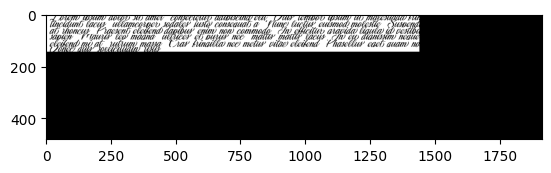

In [366]:
i=0
for y in range(0, h):
    sum = 0
    for x in range(0,w):
        sum += im_gray_th_otsu[y][x]
    media_linha = sum/w
    if media_linha < 240:
        for x in range(0,1441):
            nimg[i][x] = im_gray_th_otsu[y][x]
        i += 1
plt.imshow(nimg, cmap=comap)

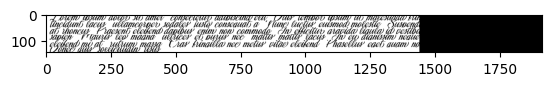

In [367]:

nimg = nimg[0:i,:]
plt.imshow(nimg, cmap=comap)

### Selecionando Linha automaticamente

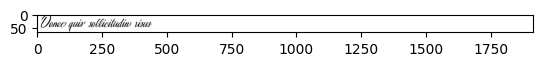

In [368]:
i=0
inicial = 0
final = 0
vetor=[]
for y in range(0, h):
    sum = 0
    for x in range(0,w):
        sum += im_gray_th_otsu[y][x]
    media_linha = sum/w
    if media_linha == 255:
        i+=1

        if i == 4:
            final = y

            if final - inicial > 15:
                n = vetor.append(im_gray_th_otsu[inicial:final, ])
                #print(inicial, final)

            inicial = final
        
        elif i>4:
            if media_linha == 255:
                i = 0
            
for i in range(0, len(vetor)):
    #fig = plt.gcf()
    plt.imshow(vetor[i], cmap=comap)
    plt.savefig(f"{i}.png",format="png")


### mesma coisa pras colunas agr

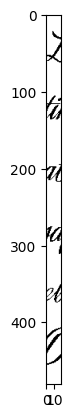

In [369]:
plt.imshow(im_gray_th_otsu[:,20:40], cmap = plt.cm.gray)

In [370]:
maior = 0
menor = 255
media_img = 0
for x in range(0,724):
    sum = 0
    for y in range(20, 40):
        sum += im_gray_th_otsu[y][x]
    media_linha = sum/20
    media_img += media_linha
    if media_linha > maior:
        maior = media_linha
    if media_linha < menor:
        menor = media_linha
    print("{:.2f}".format(media_linha))#724
media_img = media_img/1441
print(f"media {media_img} ||| maior {maior} ||| menor {menor}")

255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
191.25
178.50
191.25
204.00
204.00
216.75
216.75
216.75
229.50
191.25
165.75
153.00
153.00
178.50
178.50
191.25
178.50
165.75
153.00
140.25
165.75
178.50
165.75
191.25
216.75
216.75
242.25
242.25
242.25
229.50
242.25
229.50
229.50
242.25
229.50
229.50
229.50
229.50
242.25
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
229.50
229.50
242.25
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
242.25
242.25
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00

### media coluna com texto

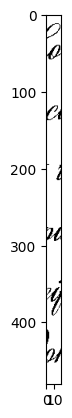

In [371]:
plt.imshow(im_gray_th_otsu[:,50:70], cmap = plt.cm.gray)

In [372]:
maior = 0
menor = 255
media_img = 0
for x in range(0,724):
    sum = 0
    for y in range(50, 70):
        sum += im_gray_th_otsu[y][x]
    media_linha = sum/20
    media_img += media_linha
    if media_linha > maior:
        maior = media_linha
    if media_linha < menor:
        menor = media_linha
    print("{:.2f}".format(media_linha))#724
media_img = media_img/1441
print(f"media {media_img} ||| maior {maior} ||| menor {menor}")

255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
216.75
204.00
204.00
216.75
216.75
216.75
216.75
216.75
204.00
191.25
191.25
191.25
204.00
204.00
178.50
153.00
165.75
204.00
204.00
216.75
229.50
229.50
229.50
229.50
229.50
229.50
229.50
229.50
229.50
229.50
229.50
229.50
229.50
229.50
242.25
242.25
229.50
229.50
165.75
140.25
140.25
204.00
191.25
229.50
216.75
229.50
229.50
204.00
191.25
216.75
229.50
229.50
242.25
242.25
242.25
255.00
255.00
229.50
178.50
153.00
178.50
216.75
229.50
229.50
229.50
229.50
229.50
191.25
165.75
153.00
153.00
204.00
204.00
216.75
216.75
229.50
229.50
242.25
242.25
242.25
242.25
216.75
191.25
165.75
165.75
191.25
229.50
255.00
242.25
216.75
191.25
178.50
178.50
204.00
229.50
255.00
255.00
229.50
191.25
165.75
153.00
191.25
204.00
229.50
242.25
229.50
229.50
242.25
229.50
216.75
216.75
229.50
242.25
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
255.00
178.50

### achando colunas automaticamente

In [373]:
nimg_cols = np.zeros((i,1441,1))
j=0
media_coluna=0

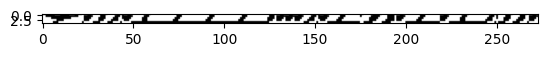

In [374]:
for x in range(0,1441):
    sum = 0
    for y in range(0, i):
        sum += nimg[y][x]
    media_coluna = sum/i
    if media_coluna < 255:
        for y in range(0,i):
            nimg_cols[y][j] = nimg[y][x]
        j+=1
nimg_cols = nimg_cols[:,0:j]
plt.imshow(nimg_cols, cmap=comap)

### Encontrando palavras automaticamente

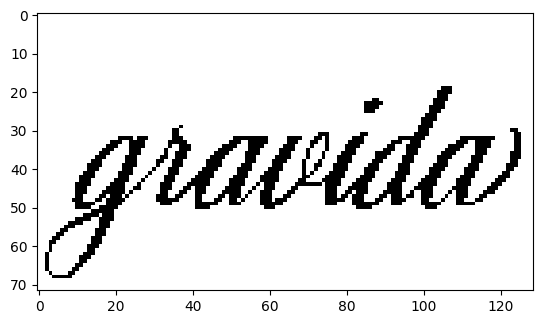

In [376]:
i=0
inicial = 0
final = 0
im = vetor[0]
palavras = []
h = im.shape[0]
for x in range(0, w):
    sum = 0
    for y in range(0,h):
        sum += im[y][x]
    media_coluna = sum/h
    if media_coluna == 255:
        i+=1

        if i == 4:
            final = x

            if final - inicial > 5:
                n = palavras.append(im[:, inicial:final])
                #print(inicial, final)

            inicial = final
        
        elif i>4:
            if media_coluna == 255:
                i = 0

for i in range(0, len(palavras)):
    fig = plt.gcf()
    plt.imshow(palavras[i], cmap=comap)
    plt.savefig(f"palavra 0-{i}.png",format="png")
    pass